# Pymaceuticals Inc.
---

### Analysis (written by Natalie Lollin)
- In terms of the number of mice taking each drug regimen, there was not a tremendous about of variation; however, Capomulin and Ramicane had the largest number of recipients, while Propriva had the lowest.  Additionally, there were roughly the same amount of male and female mice included in this study.
- In looking at the initial summary statistics, the following observations can be made:
    - Mice taking Capomulin or Ramicane had the lowest tumor volume, on average, based on both the mean and the median.  They also had the most consistent results (based on their respective standard deviations).
    -On the other hand, mice taking Ketapril and Naftisol had both the highest average tumor volume and the least consistent results.
- When comparing Capomulin, Ceftamin, Infubinol, and Ramicane's results to each other the following is observable:
    - The median final tumor volume of mice receiving either Capomulin or Ramicane was significantly lower than that of mice receiving Ceftamin or Infubinol.  Furthermore, the middle 50% of tumor volumes varied less for Capomulin and Ramicane in comparison to Ceftamin and Infubinol.
    - The distributions of final tumor volume for Capomulin and Ramicane were fairly similar to each other.  When comparing Ceftamin and Infubinol's final tumor volumes to each other, they had approximately the same median - it is worth noting that Ceftamin had a skew to the left while Infubinol's distribution was more symmetric.  Additinally, the middle 50% of final tumor volume's for Infubinol were less varied that the middle 50% for Ceftamin.
    - There was one mouse taking Infubinol whose final tumor volume was noticeably lower than the other mice taking Infubinol.  Upon further investigation, this mouse was identified as Mouse C326, who was only tracked until a timepoint of 5.
- Analysis of the scatter plot of weight vs. average tumor volume for mice on Capomulin:
    - The association between weight (g) and average tumor volume (mm3) is positive, fairly strong (as evidenced by the correlation coefficient of 0.84) and roughly linear.
    - For each additional gram that a mouse weighs, it is predicted that their average tumor size will increase by 0.95 mm3.
    - Approximately 70.56% of variation in average tumor volume can be accounted for by variation in weight.  (This is based on the coefficient of determination of the model)
- Note: It would also be possible to track each mouses tumor volume individually (an example is provided in this code for mouse L509).


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
mouse_count = len(data_complete["Mouse ID"].unique())
mouse_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df= data_complete[data_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False)]
duplicate_df
duplicate_mouse = duplicate_df["Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = data_complete[~data_complete["Mouse ID"].isin(duplicate_df["Mouse ID"])]
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = len(clean_mouse_df["Mouse ID"].unique())
new_mouse_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = clean_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
med_tumor_volume = clean_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor_volume = clean_mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor_volume = clean_mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
se_tumor_volume = clean_mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

#merge all summary stats into one dataframe
merge_a = pd.merge(mean_tumor_volume, med_tumor_volume, on = "Drug Regimen", how ="outer")
merge_a = merge_a.rename(columns = {"Tumor Volume (mm3)_x": "Mean Tumor Volume", "Tumor Volume (mm3)_y": "Median Tumor Volume"})
merge_b = pd.merge(merge_a, var_tumor_volume, on = "Drug Regimen", how ="outer")
merge_c = pd.merge(merge_b, std_tumor_volume, on = "Drug Regimen", how ="outer")
merge_final = pd.merge(merge_c, se_tumor_volume, on = "Drug Regimen", how = "outer")
merge_final

# Rename columns appropriately
stats_tumor_volume = merge_final.rename(columns= {

    'Tumor Volume (mm3)_x': "Tumor Volume Variance",
    'Tumor Volume (mm3)_y' : "Tumor Volume Std. Dev.", 
    'Tumor Volume (mm3)': "Tumor Volume Std. Err."
})
stats_tumor_volume

C:\Users\nloll\AppData\Local\Temp\ipykernel_14188\3250983458.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor_volume = clean_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
C:\Users\nloll\AppData\Local\Temp\ipykernel_14188\3250983458.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  med_tumor_volume = clean_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
C:\Users\nloll\AppData\Local\Temp\ipykernel_14188\3250983458.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line.
agg_stats_tumor_volume = clean_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
agg_stats_tumor_volume

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

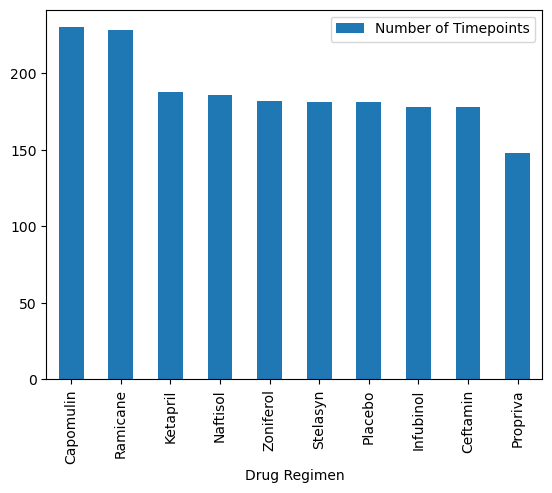

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_counts = clean_mouse_df["Drug Regimen"].value_counts()
drug_counts = pd.DataFrame(drug_counts)
drug_counts = drug_counts.rename(columns= {"Drug Regimen": "Number of Timepoints"})
drug_counts.index.name = "Drug Regimen"


drug_counts.plot(kind = 'bar')


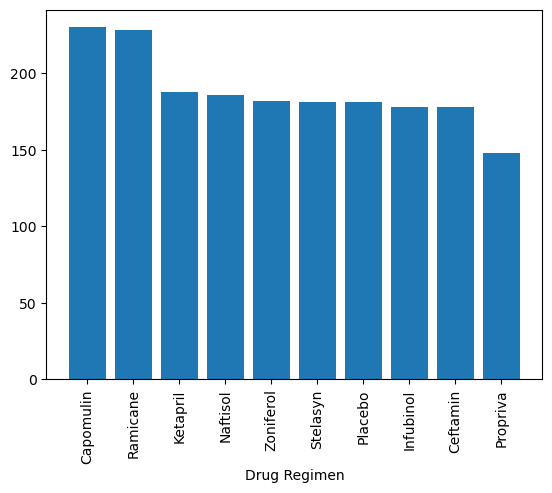

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_counts = drug_counts.reset_index().rename(columns = {"index": "Drug Regimen", 0: "Number of Timepoints"})
drug_counts
plt.bar(drug_counts['Drug Regimen'], drug_counts['Number of Timepoints'])
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.show()



array([<Axes: ylabel='Sex'>], dtype=object)

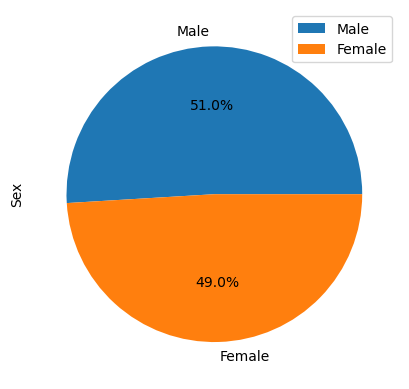

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_mouse_df["Sex"].value_counts()
gender_counts = pd.DataFrame(gender_counts)
gender_counts = gender_counts.rename(columns= {"Sex": "# of Timepoints"})
gender_counts.index.name = "Sex"
gender_counts

gender_counts.plot(kind = 'pie', subplots = True, autopct = "%1.1f%%", ylabel =  "Sex")




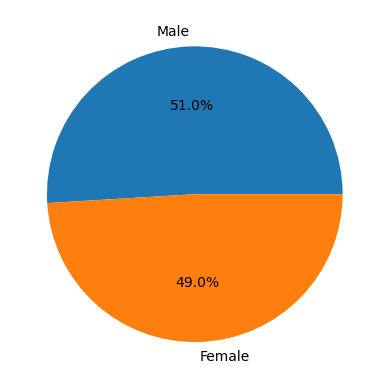

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = gender_counts.reset_index().rename(columns = {"index": "Sex", 0: "Number of Mice"})
gender_counts
labels = gender_counts["Sex"]

plt.pie(gender_counts['# of Timepoints'], labels = labels, autopct = "%1.1f%%")



plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
ramicane = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane"]
infubinol = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol"]
ceftamin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
searching_capomulin = capomulin.groupby(["Mouse ID"])["Timepoint"].idxmax()
searching_capomulin = pd.DataFrame(searching_capomulin)
searching_capomulin = searching_capomulin.reset_index(drop = True)
sorted_capomulin = capomulin.loc[searching_capomulin["Timepoint"], ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
sorted_capomulin.insert(0, "Drug Regimen", "Capomulin")
sorted_capomulin = sorted_capomulin.reset_index(drop = True)
sorted_capomulin

#Ramicane
searching_ramicane = ramicane.groupby(["Mouse ID"])["Timepoint"].idxmax()
searching_ramicane = pd.DataFrame(searching_ramicane)
searching_ramicane = searching_ramicane.reset_index(drop = True)
sorted_ramicane = ramicane.loc[searching_ramicane["Timepoint"], ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
sorted_ramicane.insert(0, "Drug Regimen", "Ramicane")
sorted_ramicane = sorted_ramicane.reset_index(drop = True)
sorted_ramicane

#Infubinol
searching_infubinol = infubinol.groupby(["Mouse ID"])["Timepoint"].idxmax()
searching_infubinol = pd.DataFrame(searching_infubinol)
searching_infubinol = searching_infubinol.reset_index(drop = True)
sorted_infubinol = infubinol.loc[searching_infubinol["Timepoint"], ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
sorted_infubinol.insert(0, "Drug Regimen", "Infubinol")
sorted_infubinol = sorted_infubinol.reset_index(drop = True)
sorted_infubinol

#Ceftamin
searching_ceftamin = ceftamin.groupby(["Mouse ID"])["Timepoint"].idxmax()
searching_ceftamin = pd.DataFrame(searching_ceftamin)
searching_ceftamin = searching_ceftamin.reset_index(drop = True)
sorted_ceftamin = ceftamin.loc[searching_ceftamin["Timepoint"], ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
sorted_ceftamin.insert(0, "Drug Regimen", "Ceftamin")
sorted_ceftamin = sorted_ceftamin.reset_index(drop = True)
sorted_ceftamin



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#First combine the above data frames
combined_sorted_df = pd.concat([sorted_capomulin, sorted_ramicane, sorted_infubinol, sorted_ceftamin], axis = 0)
combined_sorted_df = combined_sorted_df.reset_index(drop = True)
combined_sorted_df = combined_sorted_df.rename(columns = {"Timepoint" : "Final Timepoint", "Tumor Volume (mm3)" : "Final Tumor Volume (mm3)"})
combined_sorted_df


,Drug Regimen,Mouse ID,Final Timepoint,Final Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ceftamin,x226,0,45.000000
96,Ceftamin,x581,45,64.634949
97,Ceftamin,x822,45,61.386660
98,Ceftamin,y769,45,68.594745


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_capomulin = sorted_capomulin["Tumor Volume (mm3)"]
tumor_ramicane = sorted_ramicane["Tumor Volume (mm3)"]
tumor_infubinol = sorted_infubinol["Tumor Volume (mm3)"]
tumor_ceftamin = sorted_ceftamin["Tumor Volume (mm3)"]

#Work for Capomulin
quartiles_cap = tumor_capomulin.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
outliers_cap = []
for tumor in tumor_capomulin: 
    if (tumor < lower_bound_cap) | (tumor > upper_bound_cap):
        outliers_cap.append(tumor)
    
print("Capomulin's potential outliers: " + str(outliers_cap))

#Work for Ramicane
quartiles_ram = tumor_ramicane.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
outliers_ram = []
for tumor in tumor_ramicane: 
    if (tumor < lower_bound_ram) | (tumor > upper_bound_ram):
        outliers_ram.append(tumor)
    
print("Ramicane's potential outliers: " + str(outliers_ram))

#Work for Infubinol
quartiles_inf = tumor_infubinol.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
outliers_inf = []
for tumor in tumor_infubinol: 
    if (tumor < lower_bound_inf) | (tumor > upper_bound_inf):
        outliers_inf.append(tumor)
    
print("Infubinol's potential outliers: " + str(outliers_inf))

#Work for Ceftamin
quartiles_cef = tumor_ceftamin.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
outliers_cef = []
for tumor in tumor_ceftamin: 
    if (tumor <= lower_bound_cef) | (tumor >= upper_bound_cef):
        outliers_cef.append(tumor)
    
print("Ceftamin's potential outliers: " + str(outliers_cef))
    


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


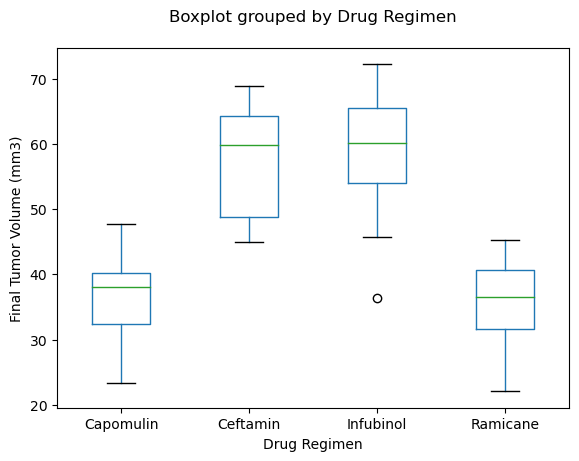

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
combined_sorted_df.boxplot(column = "Final Tumor Volume (mm3)", by = "Drug Regimen", grid = False)
plt.title(" ")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

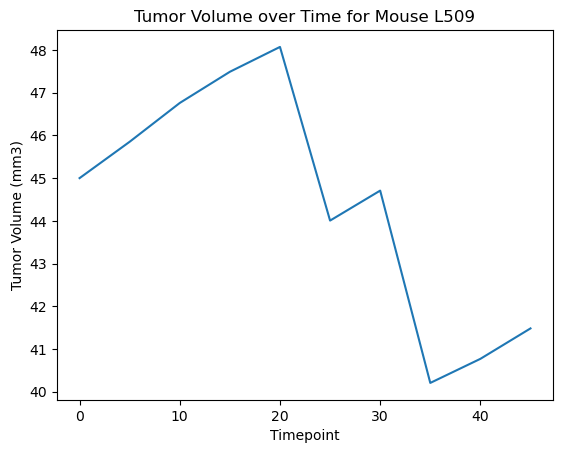

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "l509"]
x_axis1 = mouse_l509["Timepoint"]
y_axis1 = mouse_l509["Tumor Volume (mm3)"]
plt.plot(x_axis1, y_axis1)
plt.title("Tumor Volume over Time for Mouse L509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [20]:
#Group all the mice taking Capomulin by Mouse ID
#Calculate the mean tumor volume for each mouse
#create a data frame that shows the average tumor volume and weight for each mouse taking capomulin 
overall_capomulin = pd.DataFrame(capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean())
overall_capomulin = overall_capomulin.reset_index().rename(columns = {"index" : "Mouse ID", "Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
overall_capomulin_merge = pd.merge(overall_capomulin, clean_mouse_df, on = "Mouse ID", how = "inner")
overall_capomulin_merge = overall_capomulin_merge.drop_duplicates("Mouse ID")
overall_capomulin_merge

overall_capomulin_merge_final = overall_capomulin_merge[["Drug Regimen", "Mouse ID", "Average Tumor Volume (mm3)", "Weight (g)"]]
overall_capomulin_merge_final = overall_capomulin_merge_final.reset_index(drop = True)
overall_capomulin_merge_final


,Drug Regimen,Mouse ID,Average Tumor Volume (mm3),Weight (g)
0,Capomulin,b128,41.963636,22
1,Capomulin,b742,40.083699,21
2,Capomulin,f966,36.505973,17
3,Capomulin,g288,41.990097,19
4,Capomulin,g316,44.613344,22
5,Capomulin,i557,44.805810,24
6,Capomulin,i738,39.141053,20
7,Capomulin,j119,44.465236,23
8,Capomulin,j246,43.216925,21
9,Capomulin,l509,44.434474,21


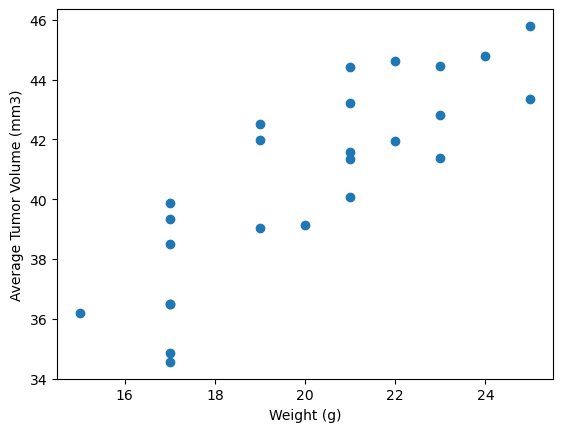

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis2 = overall_capomulin_merge_final["Weight (g)"]
y_axis2 = overall_capomulin_merge_final["Average Tumor Volume (mm3)"]
plt.scatter(x_axis2, y_axis2)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


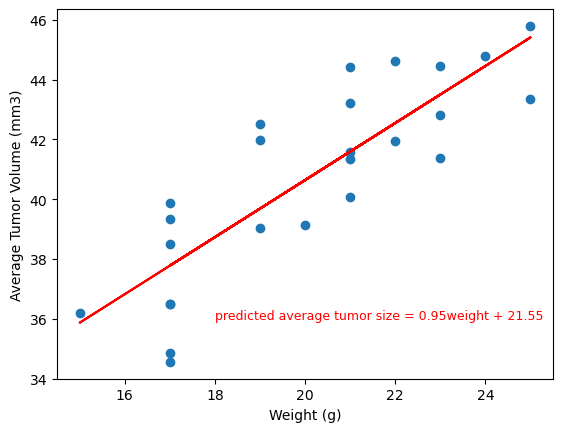

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Show the regression equation on the plot.
x_axis2 = overall_capomulin_merge_final["Weight (g)"]
y_axis2 = overall_capomulin_merge_final["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis2, y_axis2)
regress_values = x_axis2 * slope + intercept
line_eq = "predicted average tumor size = " + str(round(slope,2)) + "weight + " + str(round(intercept,2))
plt.scatter(x_axis2, y_axis2)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_axis2,regress_values,"r-")
plt.annotate(line_eq,(18, 36),fontsize=9,color="red")
print("The correlation between mouse weight and the average tumor volume is " + str(round(rvalue,2)))
plt.show()
